# شمارش تعداد تراکنش ها

In [1]:
# https://en.bitcoin.it/wiki/API_reference_(JSON-RPC)#JSON-RPC
# https://bitcoin.org/en/developer-reference

host_url = "http://178.162.214.41:5000"

In [2]:
import requests
import time
import json

# block_511798 = "000000000000000000558c3bf3c4695bde12386d1d75aa31dafe5107f900950e"
genesis = "000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f"

def get_block(block_hash):
    url = 'http://127.0.0.1:8332/rest/block/'+ block_hash +'.json'
    block_response = requests.get(url)
    result = json.loads(block_response.content)
    return result

# print (block_response.status_code)



In [6]:
import datetime
current_block_hash = genesis
sum_tx = 0
tx_list = []

for i in range (10000):
    current_block = get_block(current_block_hash)
    sum_tx += len(current_block["tx"])
    tx_list.append([datetime.datetime.fromtimestamp(current_block["time"]).strftime('%Y'),datetime.datetime.fromtimestamp(current_block["time"]).strftime('%m'),len(current_block["tx"])])
    if (i%1000 == 0):
        print ("{}({},{}),".format(len(current_block["tx"]), sum_tx,len(tx_list)),end='')
#         time.sleep(0.5)
    current_block_hash = current_block["nextblockhash"]


1(1,1),1(1020,1001),1(2031,2001),1(3051,3001),1(4059,4001),1(5064,5001),1(6070,6001),1(7078,7001),1(8083,8001),1(9087,9001),

In [21]:
import pandas as pd

df = pd.DataFrame(tx_list)
df.tail()


,0,1,2
513788,2018,03,540
513789,2018,03,756
513790,2018,03,1691
513791,2018,03,1735
513792,2018,03,1600


513793

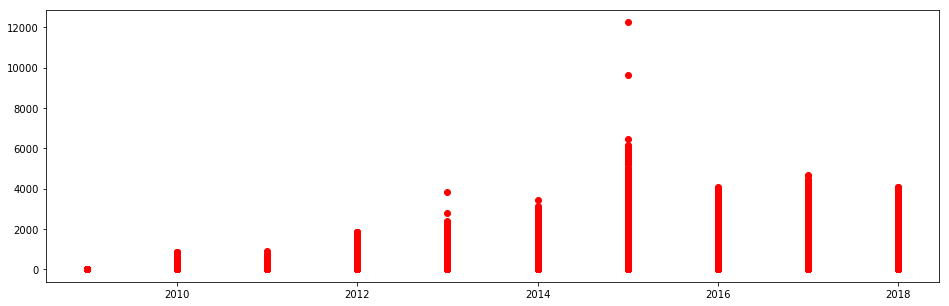

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  
from pylab import rcParams
rcParams['figure.figsize'] = 16, 5

fig = plt.plot(df[0],df[2],'ro')
# fig.set_size_inches(18.5, 10.5, forward=True)

len(df)


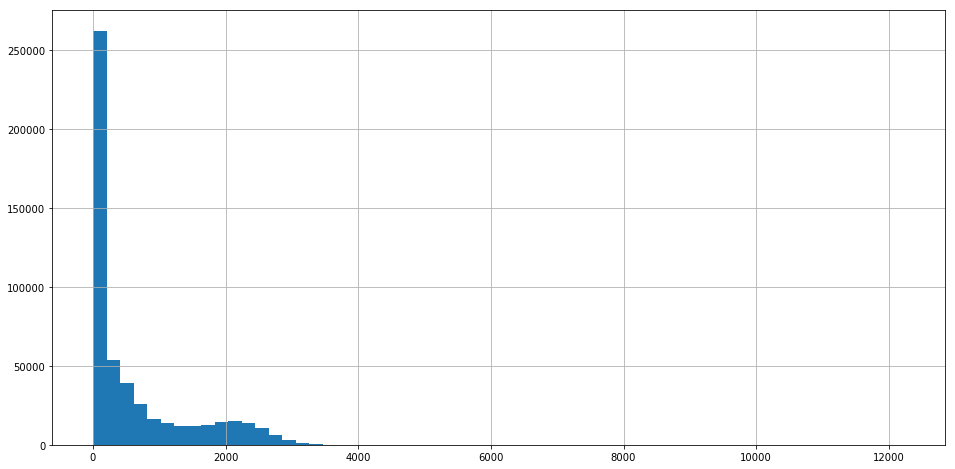

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

df[2].hist(bins=60)


In [20]:
# For the Next Runs !

for i in range (500000):
    current_block = get_block(current_block_hash)
    sum_tx += len(current_block["tx"])
    tx_list.append([datetime.datetime.fromtimestamp(current_block["time"]).strftime('%Y'),datetime.datetime.fromtimestamp(current_block["time"]).strftime('%m'),len(current_block["tx"])])
    if (i%1000 == 0):
        print ("{}({},{}),".format(len(current_block["tx"]), sum_tx,len(tx_list)),end='')
        time.sleep(2)
    current_block_hash = current_block["nextblockhash"]


12(289666,110001),12(298525,111001),1(311141,112001),6(320903,113001),9(342285,114001),5(367217,115001),10(382930,116001),5(393674,117001),24(404930,118001),63(419382,119001),56(435536,120001),30(454172,121001),8(471412,122001),15(487003,123001),6(505260,124001),27(523141,125001),2(545694,126001),8(566173,127001),11(598316,128001),14(637173,129001),9(691066,130001),36(741453,131001),15(798645,132001),44(841275,133001),38(905406,134001),26(960901,135001),57(1021397,136001),54(1073992,137001),58(1130286,138001),44(1176784,139001),127(1230769,140001),31(1287570,141001),80(1342956,142001),119(1393400,143001),143(1443654,144001),33(1492829,145001),9(1536323,146001),143(1584392,147001),78(1628148,148001),129(1674379,149001),10(1718407,150001),20(1764047,151001),31(1807267,152001),2(1847735,153001),45(1886526,154001),90(1926937,155001),82(1968130,156001),40(2008989,157001),120(2046713,158001),5(2084785,159001),1(2118551,160001),15(2156120,161001),31(2198085,162001),39(2243475,163001),26(22877

2017(290139154,503001),1395(292093951,504001),1576(293871798,505001),561(295231027,506001),1108(296682224,507001),2088(297987702,508001),1641(299221104,509001),580(300403744,510001),205(301561672,511001),1218(302796634,512001),1022(304066307,513001),

KeyError: 'nextblockhash'

In [48]:
# Year, Month, Count

df.to_csv("tx_stats",index=False)